In [1]:
import pandas as pd # pandasのインポート
# irisファイルを読み込んで、データフレームに変換
df = pd.read_csv('iris.csv')
df.head(3) # 上位3件の表示

,がく片長さ,がく片幅,花弁長さ,花弁幅,種類
0,0.22,0.63,0.08,0.04,Iris-setosa
1,0.17,0.42,0.35,0.04,Iris-setosa
2,0.11,0.50,0.13,0.04,Iris-setosa


In [2]:
df['種類'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [3]:
syurui = df['種類'].unique()
syurui[0]

'Iris-setosa'

In [4]:
df['種類'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: 種類, dtype: int64

In [5]:
df.tail(3)#末尾3件の表示

,がく片長さ,がく片幅,花弁長さ,花弁幅,種類
147,0.61,0.42,NaN,0.79,Iris-virginica
148,0.53,0.58,0.63,0.92,Iris-virginica
149,0.44,0.42,0.41,0.71,Iris-virginica


In [6]:
df.isnull()#各マスが欠損値かどうか調べる

,がく片長さ,がく片幅,花弁長さ,花弁幅,種類
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,True,False,False
148,False,False,False,False,False


In [7]:
#列単位で欠損値が存在するか調べる
df.isnull().any(axis=0)

がく片長さ     True
がく片幅      True
花弁長さ      True
花弁幅       True
種類       False
dtype: bool

In [8]:
df.sum() # 各列の合計値を計算

がく片長さ                                                62.29
がく片幅                                                 65.62
花弁長さ                                                 72.04
花弁幅                                                  66.22
種類       Iris-setosaIris-setosaIris-setosaIris-setosaIr...
dtype: object

In [9]:
# 各列に欠損値がいくつあるか集計
tmp = df.isnull()
tmp.sum()

がく片長さ    2
がく片幅     1
花弁長さ     2
花弁幅      2
種類       0
dtype: int64

In [10]:
# 欠損値が1つでもある行を削除した結果を、df2に代入
df2 = df.dropna(how = 'any', axis = 0)

df2.tail(3) # 欠損値の存在確認

,がく片長さ,がく片幅,花弁長さ,花弁幅,種類
146,0.56,0.21,0.69,0.46,Iris-virginica
148,0.53,0.58,0.63,0.92,Iris-virginica
149,0.44,0.42,0.41,0.71,Iris-virginica


In [11]:
df.isnull().any(axis = 0)

がく片長さ     True
がく片幅      True
花弁長さ      True
花弁幅       True
種類       False
dtype: bool

In [12]:
df['花弁長さ'] = df['花弁長さ'].fillna(0)
df.tail(3)

,がく片長さ,がく片幅,花弁長さ,花弁幅,種類
147,0.61,0.42,0.00,0.79,Iris-virginica
148,0.53,0.58,0.63,0.92,Iris-virginica
149,0.44,0.42,0.41,0.71,Iris-virginica


In [13]:
#数値列の各平均値を計算（文字列の列は自動的に除外してくれる）
df.mean()

がく片長さ    0.420878
がく片幅     0.440403
花弁長さ     0.480267
花弁幅      0.447432
dtype: float64

In [14]:
#がく片長さ列の平均値を計算
df['がく片長さ'].mean()

0.42087837837837844

In [15]:
df.std() # 各列の標準偏差

がく片長さ    0.228910
がく片幅     0.181137
花弁長さ     0.236909
花弁幅      0.309960
dtype: float64

In [16]:
df = pd.read_csv('iris.csv')

# 各列の平均値を計算して、colmeanに代入
colmean = df.mean()

# 平均値で欠損値を穴埋めしてdf2に代入
df2 = df.fillna(colmean)
# 欠損値があるか確認
df2.isnull().any(axis = 0)

がく片長さ    False
がく片幅     False
花弁長さ     False
花弁幅      False
種類       False
dtype: bool

In [17]:
xcol = ['がく片長さ', 'がく片幅', '花弁長さ', '花弁幅']

x = df2[xcol]
t = df2['種類']

In [18]:
# 関数のインポート
from sklearn import tree
# モデルの作成
model = tree.DecisionTreeClassifier(max_depth = 2,
                                    random_state=0)

In [19]:
model.fit(x, t) # モデルの学習
model.score(x, t) # 学習済みモデルの正解率計算

0.94

In [21]:
# 関数のインポート
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, t,
    test_size = 0.3, random_state = 0)

#x_train,y_trainが学習に利用する訓練
#x_test,y_testが検証に利用するテストデータ

In [22]:
print(x_train.shape) # x_trainの行数・列数を表示
print(x_test.shape) # x_test　の行数・列数を表示

(105, 4)
(45, 4)


In [23]:
# 訓練データで再学習
model.fit(x_train, y_train)

# テストデータの予測結果と実際の答えが合致する正解率を計算
model.score(x_test, y_test)

0.9555555555555556

In [24]:
import pickle
with open('irismodel.pkl', 'wb') as f:
    pickle.dump(model, f)

In [25]:
model.tree_.feature

array([ 3, -2,  3, -2, -2], dtype=int64)

In [26]:
model.tree_.threshold

array([ 0.275, -2.   ,  0.69 , -2.   , -2.   ])

In [27]:
# ノード番号1、3、4に到達したアヤメの種類ごとの数
print(model.tree_.value[1]) # ノード番号1に到達したとき
print(model.tree_.value[3]) # ノード番号3に到達したとき
print(model.tree_.value[4]) # ノード番号4に到達したとき

[[34.  0.  0.]]
[[ 0. 31.  6.]]
[[ 0.  1. 33.]]


In [28]:
model.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

[Text(133.92000000000002, 181.2, 'kaben_haba <= 0.275\ngini = 0.664\nsamples = 105\nvalue = [34, 32, 39]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(200.88000000000002, 108.72, 'kaben_haba <= 0.69\ngini = 0.495\nsamples = 71\nvalue = [0, 32, 39]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.272\nsamples = 37\nvalue = [0, 31, 6]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.057\nsamples = 34\nvalue = [0, 1, 33]')]

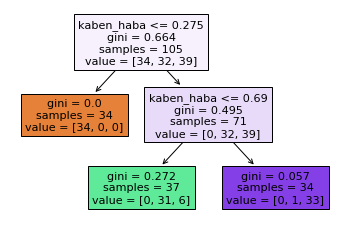

In [29]:
# 描画関数の仕様上、和名の特徴量を英字に直す
x_train.columns = ['gaku_nagasa', 'gaku_haba',
'kaben_nagasa','kaben_haba']
# 描画関数の利用
from sklearn.tree import plot_tree
# plot_tree関数で決定木を描画
plot_tree(model, feature_names = x_train.columns,
filled = True)

# 練習問題

In [30]:
import pandas as pd

In [39]:
df = pd.read_csv('ex2.csv')
df.head(3)

,x0,x1,x2,x3,target
0,-1.244674,1.452124,-1.184385,-0.839169,1
1,-1.662920,-0.375804,-0.956673,0.380114,0
2,-1.926513,NaN,-1.203904,-0.728801,1


In [40]:
df.shape

(100, 5)

In [41]:
df["target"].value_counts()

1    80
0    20
Name: target, dtype: int64

In [42]:
df.isnull().sum()

x0        0
x1        1
x2        1
x3        0
target    0
dtype: int64

In [43]:
df2 = df.fillna(df.median())

In [44]:
xcol=['x0','x1','x2','x3']
x = df2[xcol]
t =df2['target']

In [45]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, t,
    test_size = 0.2, random_state = 0)

In [46]:
from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth = 3,
    random_state = 0)
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [47]:
model.score(x_test, y_test)

0.95

In [48]:
newdata = [[1.56,0.23, -1.1,2.8]]

answer = model.predict(newdata)
answer

array([1], dtype=int64)